# Clusterings

## K-means

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

In [3]:
km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10, # run the k-means 10 times independently
    max_iter=300,
    tol = 1e-04,
    random_state=0
)

y_km = km.fit_predict(X)


cluster centers are under the `cluster_center` attribute of the k-means object

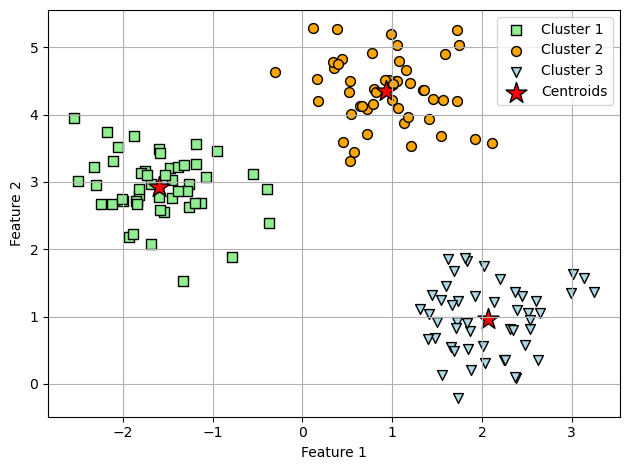

In [4]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_02.png', dpi=300)
plt.show()

## K-means ++

In sklearn, K-means ++ is the default since `init= 'k-means++` is default

## Evaluation: Elbow and sillouette 

Finding the within-cluster SSE: `inertia_`

In [5]:
km.inertia_

72.476016709967

In [6]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [7]:
km = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter =300,
    tol = 1e-04, # stops if the change in inertia is less than this value
    random_state = 0
)

In [8]:
y_km = km.fit_predict(X)

In [9]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

In [10]:
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')

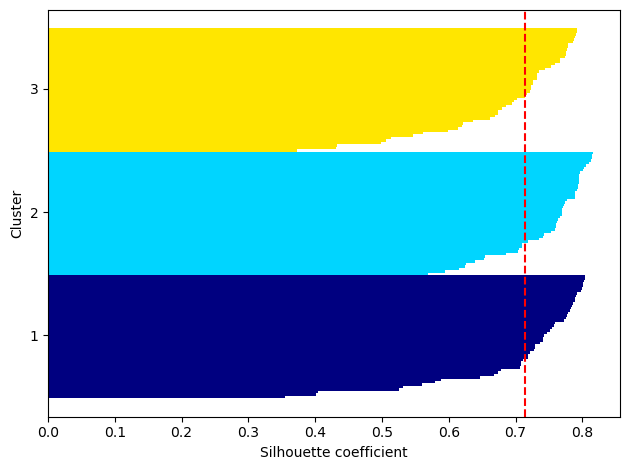

In [11]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_04.png', dpi=300)
plt.show()

# Hierarchical clustering- manual

Step 1: Compute a pairwise distance matrix of all examples

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10 # generate a 5x3 matrix with random numbers from 0-1
df = pd.DataFrame(X, columns=variables, index=labels)
X.shape

(5, 3)

Calculate the eucledian pairwise distance between each pair of input examples

In [ ]:
from scipy.spatial.distance import pdist, squareform


row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram


In [17]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [18]:
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [20]:
row_clusters = linkage(df.values,
                       method = 'complete',
                       metric = 'euclidean')

In [22]:
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [21]:
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


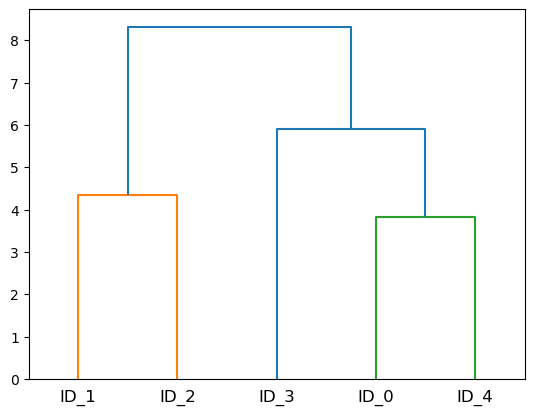

In [24]:
row_dendr = dendrogram(
    row_clusters,
    labels = labels
)

more information about attaching heatmaps to dendogram could be found in the book.

# Hierarchical clustering - sklearn

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
ac = AgglomerativeClustering(n_clusters = 3,
                             metric = 'euclidean',
                             linkage = 'complete')

In [28]:
labels = ac.fit_predict(X)

In [29]:
labels

array([1, 0, 0, 2, 1])

Looking at the predicted cluster labels, we can see that the first and the fifth examples (ID_0 and ID_4) were assigned to one cluster (label 1), and the examples ID_1 and ID_2 were assigned to a second cluster (label 0). The example ID_3 was put into its own cluster (label 2)

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [32]:
db =DBSCAN(eps =0.2,
           min_samples=5,
           metric = 'euclidean')
y_db = db.fit_predict(X)